## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

In [3]:
## reading data
bike_data = pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike dataframe



In [5]:
bike_data.shape

(730, 16)

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<b> We dont have any missing values here </b>

In [7]:
#Describe gives us the statistical summary of the data

bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<b> Since the difference between mean and median is not much , we can conclude that data has no outliers </b>

- Now that you’ve read and inspected the data, let’s move on to visualising it. This will help in interpreting the data well and identifying the variables that can turn out to be useful in building the model.

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

<h6> Visualising Numeric Variables </h6>

Let's make a pairplot of all the numeric variables

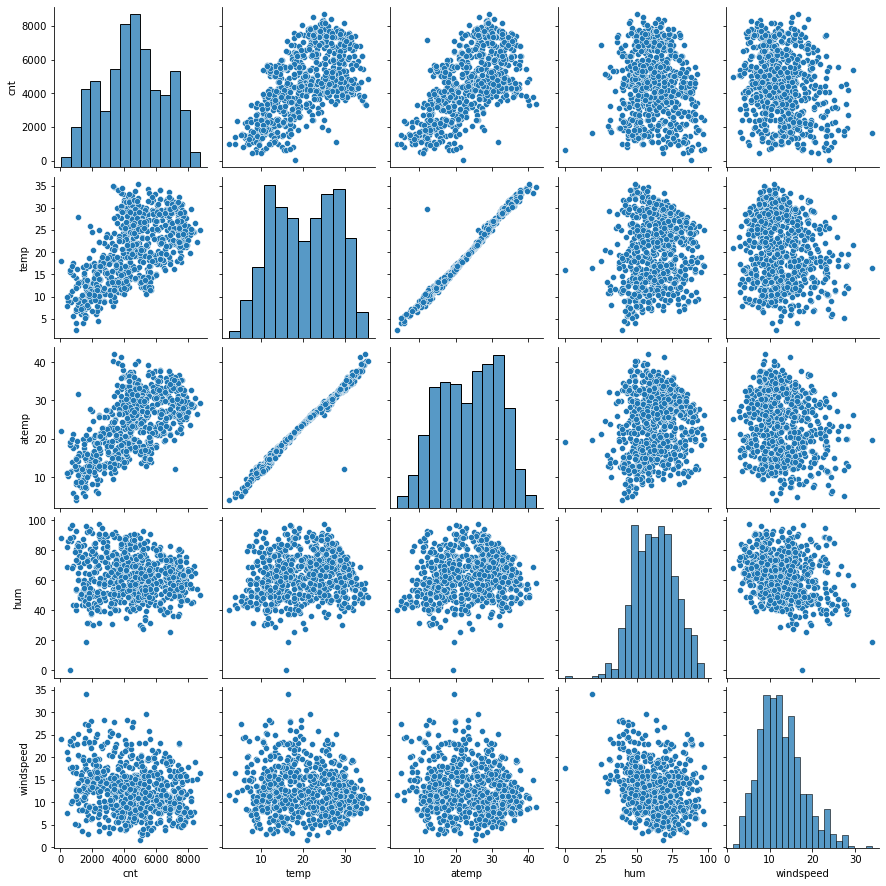

In [8]:
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

<h6> Visualising Categorical Variables </h6>

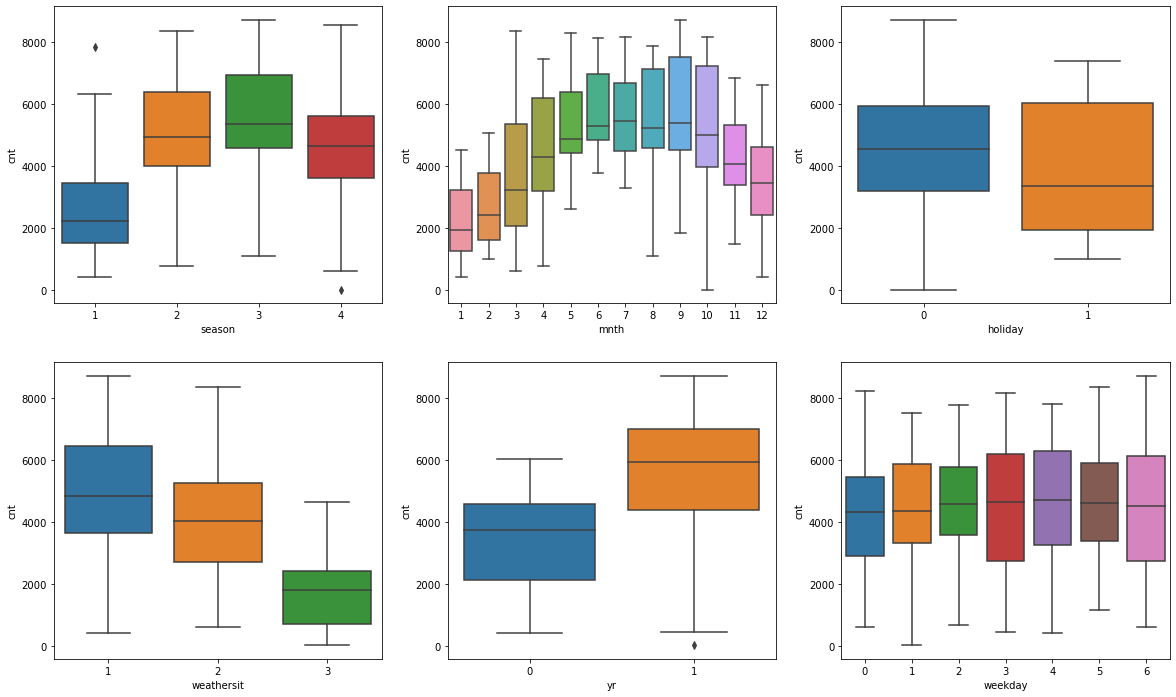

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.show()

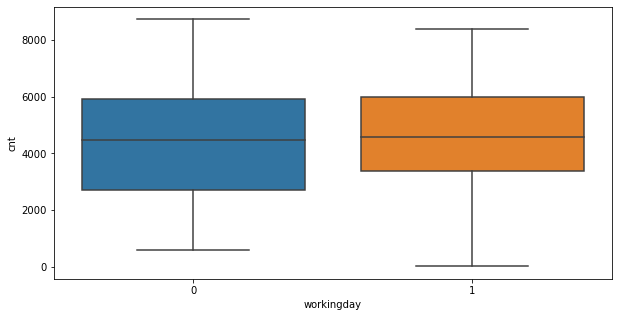

In [10]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

### Observations:
season:
- Almost 32% of the bike booking were happening in fall with a median of over 5000 booking (for the period of 2 years). This was followed by summer & winter with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.<br>

weathersit:<br>
- Almost 67% of the bike booking were happening during ‘Clear-Partlycloudy with a median of close to 5000 booking (for the period of 2 years). This was followed by Mist-Cloudy with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.<br>

yr:<br>
- Almost 99% of the bike booking were increased in year with median of close to previus year booking (for the period of 2 years). This indicates, yr can be a good predictor for the dependent variable.<br>

holiday:<br>
- Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.<br>

weekday:<br>
- weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.<br>

workingday:<br>
- Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable<br>

mnth:<br>
- Almost 10% of the bike booking were happening in the months may,jun,jul,aug & sept with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

## Step 3: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [11]:
### Converting some numeric values to categorical data
import calendar
bike_data['mnth'] = bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])

In [12]:
## mapping seasons
bike_data.season = bike_data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [13]:
## mapping weathersit
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [14]:
## mapping weekday
bike_data.weekday = bike_data.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [15]:
# Check the dataframe now

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
## dropping columns that are irrelevant for the model - 
bike_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Dummy Variables

In [17]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bike_data[['season','mnth','weekday','weathersit']]

In [18]:
# Let's drop the first column from status df using 'drop_first = True' which is redundant dummy var
dummy = pd.get_dummies(dummy,drop_first=True )

In [19]:
dummy.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Concat the dummy df with the original one

In [20]:
# Add the results to the original dataframe
bike_data = pd.concat([dummy,bike_data],axis = 1)

In [21]:
# Now let's see the head of our dataframe.
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
## dropping columns for which dummy variables were created
bike_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [23]:
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
bike_data.shape

(730, 30)

Now that the data has been prepared, let's do the scaling in the next segment.

### Initial Steps

Before model building, you first need to perform the test-train split and scale the features.

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [25]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train, test = train_test_split(bike_data, train_size = 0.7,random_state = 100)

## Step 5 :Rescaling the Features

In [26]:
# Inistalising an object
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

# Fit on Data

train[num_vars] = scaler.fit_transform(train[num_vars])
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [27]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that you have prepared the data and are done with the test-train split, let’s prepare a heat map and take a look at the correlations between the variables.

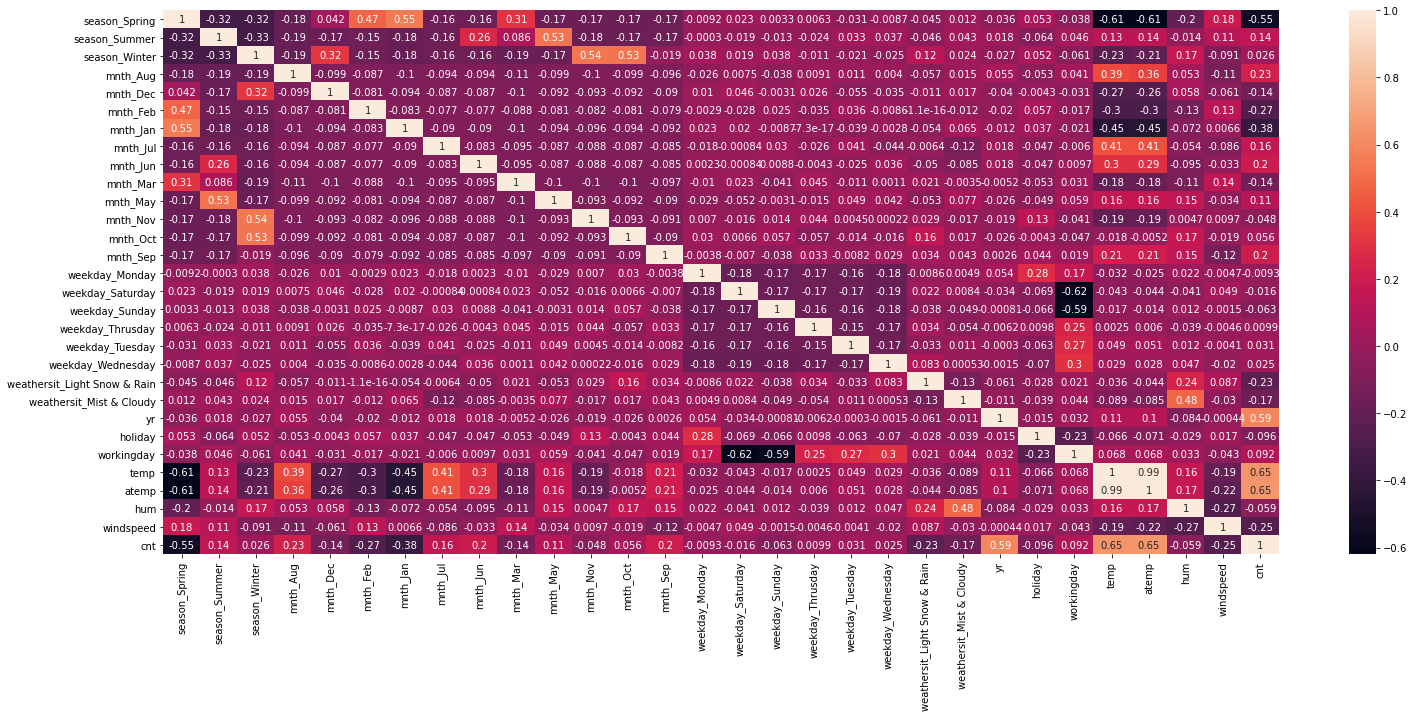

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 10))
sns.heatmap(train.corr(), annot = True, cmap="rocket")
plt.show()

We'll first build a model using all the columns

### Dividing into X and Y sets for the model building

In [29]:
y_train = train.pop('cnt')
X_train = train

## Step 6: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [30]:
# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)    # running RFE
rfe = rfe.fit(X_train, y_train)

In [31]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 9),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 12),
 ('weekday_Wednesday', False, 14),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1)]

### Starting with all the columns selected by RFE

#### Model 1

In [32]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday', 'atemp'],
      dtype='object')

In [34]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

# Check the parameters obtained
lm.params

const                           0.280276
season_Spring                  -0.056416
season_Summer                   0.053249
season_Winter                   0.097229
mnth_Jul                       -0.057558
mnth_Sep                        0.082971
weekday_Saturday                0.017480
weathersit_Light Snow & Rain   -0.238105
weathersit_Mist & Cloudy       -0.053198
yr                              0.229800
holiday                        -0.093935
temp                            0.530449
hum                            -0.169705
windspeed                      -0.183413
dtype: float64

In [35]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.31e-189
Time:                        09:21:11   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Manual Model Development using statsmodel

In [36]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [37]:
calculateVIF(X_train_rfe)

,Features,VIF
0,const,74.88
1,season_Spring,5.02
11,temp,3.61
3,season_Winter,3.48
2,season_Summer,2.62
12,hum,1.90
8,weathersit_Mist & Cloudy,1.56
4,mnth_Jul,1.48
5,mnth_Sep,1.30
7,weathersit_Light Snow & Rain,1.24


dropping `weekday_Saturday` since it has `p > 0.05`


In [38]:
X_train_new = X_train_rfe.drop(["weekday_Saturday"], axis = 1)

   - Rebuilding the model without 'weekday_Saturday'

#### Model 2

In [39]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Check the parameters obtained
lm.params

const                           0.284754
season_Spring                  -0.056371
season_Summer                   0.053078
season_Winter                   0.097610
mnth_Jul                       -0.057247
mnth_Sep                        0.083251
weathersit_Light Snow & Rain   -0.236920
weathersit_Mist & Cloudy       -0.052653
yr                              0.229357
holiday                        -0.096878
temp                            0.529863
hum                            -0.172595
windspeed                      -0.182190
dtype: float64

In [40]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.95e-190
Time:                        09:21:12   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2848      0.034      8.258      0.000       0.217       0.353
season_Spring                   -0.0564      0.021     -2.700      0.007      -0.097      -0.015
season_Summer                    0.0531      0.015      3.536      0.000       0.024       0.083
season_Winter                    0.0976      0.017      5.643      0.000       0.064       0.132
mnth_Jul                        -0.0572      0.018     -3.123      0.002      -0.093      -0.021
mnth_Sep                         0.0833      0.017      4.973      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
weathersit_Mist & Cloudy        -0.0527      0.010     -5.017      0.000      -0.073      -0.032
yr                               0.2294      0.008     28.208      0.000       0.213       0.245
holiday                         -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                             0.5299      0.034     15.728      0.000       0.464       0.596
hum                             -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed                       -0.1822      0.026     -7.074      0.000      -0.233      -0.132
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
calculateVIF(X_train_new)

,Features,VIF
0,const,74.37
1,season_Spring,5.02
10,temp,3.61
3,season_Winter,3.48
2,season_Summer,2.62
11,hum,1.89
7,weathersit_Mist & Cloudy,1.56
4,mnth_Jul,1.48
5,mnth_Sep,1.30
6,weathersit_Light Snow & Rain,1.24


<h5> We generally want a VIF that is less than 5. So there are clearly some variables we need to drop. </h5>

dropping `season_Spring` which VIF `value > 5`

In [42]:
X_train_new = X_train_new.drop(['season_Spring'], axis=1)

#### Model 3

In [43]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Check the parameters obtained
lm.params

const                           0.226223
season_Summer                   0.081529
season_Winter                   0.134695
mnth_Jul                       -0.047814
mnth_Sep                        0.096174
weathersit_Light Snow & Rain   -0.231830
weathersit_Mist & Cloudy       -0.050192
yr                              0.227954
holiday                        -0.098909
temp                            0.597749
hum                            -0.184135
windspeed                      -0.189481
dtype: float64

In [44]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.89e-190
Time:                        09:21:12   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2262      0.027      8.384      0.000       0.173       0.279
season_Summer                    0.0815      0.011      7.580      0.000       0.060       0.103
season_Winter                    0.1347      0.011     12.732      0.000       0.114       0.155
mnth_Jul                        -0.0478      0.018     -2.640      0.009      -0.083      -0.012
mnth_Sep                         0.0962      0.016      5.957      0.000       0.064       0.128
weathersit_Light Snow & Rain    -0.2318      0.026     -8.757      0.000      -0.284      -0.180
weathersit_Mist & Cloudy        -0.0502      0.011     -4.771      0.000      -0.071      -0.030
yr                               0.2280      0.008     27.917      0.000       0.212       0.244
holiday                         -0.0989      0.026     -3.844      0.000      -0.149      -0.048
temp                             0.5977      0.023     26.494      0.000       0.553       0.642
hum                             -0.1841      0.038     -4.876      0.000      -0.258      -0.110
windspeed                       -0.1895      0.026     -7.351      0.000      -0.240      -0.139
==============================================================================
Omnibus:                       52.291   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.838
Skew:                          -0.600   Prob(JB):                     1.72e-23
Kurtosis:                       4.869   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
calculateVIF(X_train_new)

,Features,VIF
0,const,44.97
10,hum,1.87
9,temp,1.60
6,weathersit_Mist & Cloudy,1.55
3,mnth_Jul,1.43
1,season_Summer,1.33
2,season_Winter,1.29
5,weathersit_Light Snow & Rain,1.24
4,mnth_Sep,1.19
11,windspeed,1.18


#### We can see `p-values 0 and VIF less than 5`, now we will check for correlation between remaining varibales

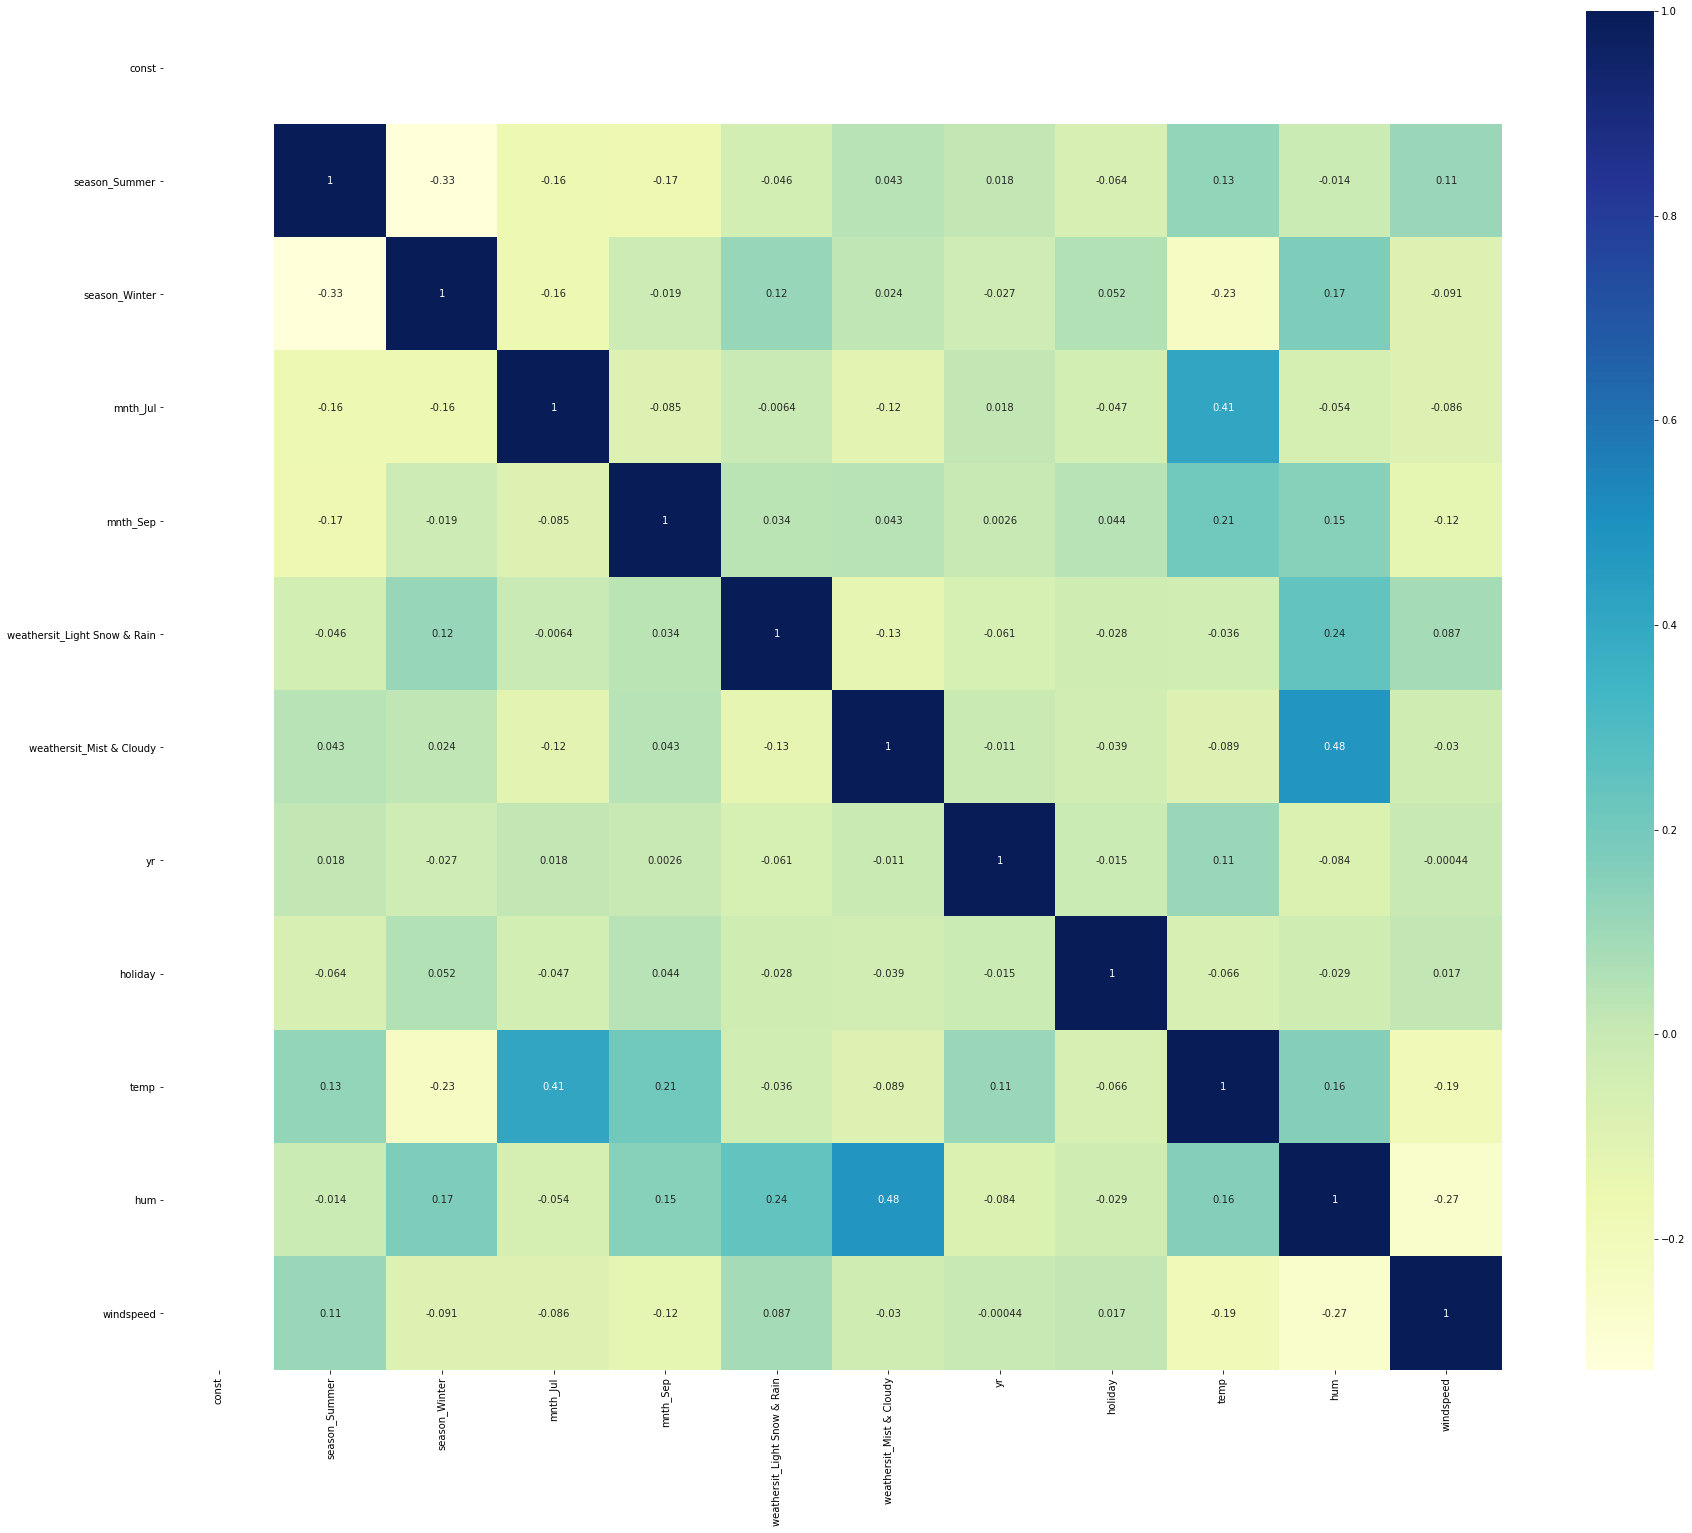

In [46]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [47]:
calculateVIF(X_train_new)

,Features,VIF
0,const,44.97
10,hum,1.87
9,temp,1.60
6,weathersit_Mist & Cloudy,1.55
3,mnth_Jul,1.43
1,season_Summer,1.33
2,season_Winter,1.29
5,weathersit_Light Snow & Rain,1.24
4,mnth_Sep,1.19
11,windspeed,1.18


Observations
- Model looks perfect with 9 variables and R-squared : 84 , Adj. R-squared : 83.6 ~ 84
- VIF less than 2
- P values - 0
- Prob (F-statistic) - almost equal to 0

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Before making the predictions, you need to be certain that the model is reliable. To that end, you need to first perform a residual analysis of the error terms and then move on to making the predictions on the test set; and finally, evaluate the model based on the predictions.

In [48]:
y_train_cnt = lm.predict(X_train_lm)
y_train_cnt

576    0.709863
426    0.502162
728    0.383329
482    0.593414
111    0.253651
         ...   
578    0.810002
53     0.245962
350    0.270859
79     0.293796
520    0.659783
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

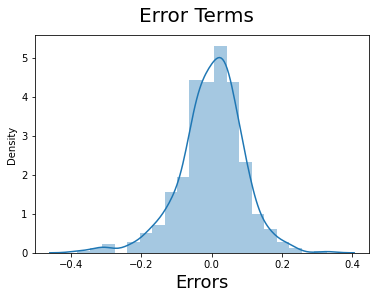

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Now that the model building is done, let’s go ahead and make inferences on the model.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. `third model`.

#### Applying the scaling on the test sets

In [50]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])
test.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [51]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [52]:
y_test = test.pop('cnt')
X_test = test

In [53]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         220 non-null    float64
 1   season_Summer                 220 non-null    uint8  
 2   season_Winter                 220 non-null    uint8  
 3   mnth_Jul                      220 non-null    uint8  
 4   mnth_Sep                      220 non-null    uint8  
 5   weathersit_Light Snow & Rain  220 non-null    uint8  
 6   weathersit_Mist & Cloudy      220 non-null    uint8  
 7   yr                            220 non-null    int64  
 8   holiday                       220 non-null    int64  
 9   temp                          220 non-null    float64
 10  hum                           220 non-null    float64
 11  windspeed                     220 non-null    float64
dtypes: float64(4), int64(2), uint8(6)
memory usage: 13.3 KB


In [54]:
# Making predictions using the final model

y_pred = lm.predict(X_test)

In [55]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8050021066128354


Adjusted R^2 Value for TEST

In [56]:
X_test.shape

(220, 12)

In [57]:
# We already have the value of R^2 (calculated in above step)
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7936978809092317

#### mean_squared_error MSE

In [58]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009323683777780676

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.


Text(0, 0.5, 'y_pred')

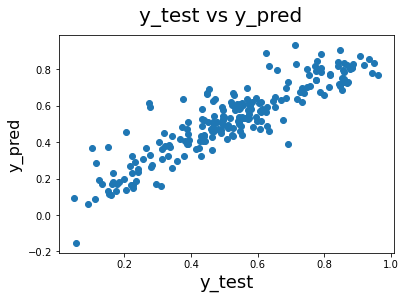

In [59]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Final Results
- Train R^2 :0.833
- Train Adjusted R^2 :0.830
- Test R^2 :0.805
- Test Adjusted R^2 :0.793
- MSE : 0.009323

#### This seems to be a really good model that can very well 'Generalize' various datasets.

To write the Equation obtained

In [60]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
9,temp,0.597749
7,yr,0.227954
0,const,0.226223
2,season_Winter,0.134695
4,mnth_Sep,0.096174
1,season_Summer,0.081529
3,mnth_Jul,-0.047814
6,weathersit_Mist & Cloudy,-0.050192
8,holiday,-0.098909


We can see that the equation of our best fitted line is:

 cnt = 0.226223 + 0.597749 x temp + 0.227954 x yr + 0.1346951 x season_Winter + 0.096174 x mnth_Sep + 0.081529 x season_Summer - 0.047814 x mnth_Jul	- 0.050192 x weathersit_Mist & Cloudy - 0.098909 x holiday - 0.184135 x hum - 0.189481 x windspeed - 0.231830 x weathersit_Light Snow & Rain

#### Analysing the above model, the comapny should focus on the following features:
- year: The company should encounter an increase in the number of users when the situation comes back to normal as compared to 2019.
- season: The company should focus on expanding it's business in the Summer and the Fall season.
- weather: The users prefer to rent a bike when the weather is pleasant i.e. either clear or cloudy.
- temp: The users prefer to ride or rent a bike in a moderate temperature.